In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cvx = pd.read_csv('data/CVX.csv')

In [3]:
cvx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,TR,+DM 1,...,12_day_EMA,30_day_EMA,MACD,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
0,2016-05-09,101.620003,101.800003,99.080002,100.349998,80.794678,9342100,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-10,100.639999,101.290001,100.410004,101.269997,81.535400,6698100,6698100,NaN,NaN,...,NaN,NaN,NaN,0.740722,0.740722,0.000000,NaN,NaN,NaN,NaN
2,2016-05-11,101.239998,101.739998,100.150002,101.139999,81.430748,6850700,-152600,1.589996,0.449997,...,NaN,NaN,NaN,-0.104652,0.000000,0.104652,NaN,NaN,NaN,NaN
3,2016-05-12,102.150002,102.419998,101.080002,102.120003,82.219772,6532400,6379800,1.339996,0.680000,...,NaN,NaN,NaN,0.789024,0.789024,0.000000,NaN,NaN,NaN,NaN
4,2016-05-13,101.629997,102.040001,100.360001,100.739998,81.108696,5665200,714600,1.760002,0.000000,...,NaN,NaN,NaN,-1.111076,0.000000,1.111076,NaN,NaN,NaN,NaN


In [4]:
cvx.shape

(1259, 30)

In [5]:
cvx.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
OBV            0
TR             2
+DM 1          2
-DM 1          2
TR14          15
+DM14         15
-DM14         15
+DI14         15
-DI14         15
DI 14 Diff    15
DI 14 Sum     15
DX            15
ADX           28
12_day_EMA    11
30_day_EMA    29
MACD          29
Change         1
Gain           1
Loss           1
Avg Gain      14
Avg Loss      14
RS            14
RSI           14
dtype: int64

In [6]:
cvx = cvx.dropna()

In [7]:
cvx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,TR,+DM 1,...,12_day_EMA,30_day_EMA,MACD,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
29,2016-06-20,102.879997,103.400002,102.599998,102.610001,83.487595,6627000,-728100,1.830002,1.660004,...,101.857500,101.272332,0.585167,0.846177,0.846177,0.000000,0.291747,0.198178,1.472143,59.549267
30,2016-06-21,102.690002,103.449997,102.269997,103.239998,84.000191,4938700,4210600,1.180000,0.000000,...,102.072499,101.368666,0.703833,0.512596,0.512596,0.000000,0.320805,0.198178,1.618767,61.814086
31,2016-06-22,103.500000,103.550003,102.190002,102.290001,83.227249,4866400,-655800,1.360001,0.100006,...,102.165833,101.402666,0.763167,-0.772942,0.000000,0.772942,0.320805,0.218518,1.468090,59.482833
32,2016-06-23,103.449997,104.449997,103.070000,104.440002,84.976555,5593600,4937800,2.159996,0.899994,...,102.259166,101.512666,0.746500,1.749306,1.749306,0.000000,0.438200,0.218518,2.005322,66.725694
33,2016-06-24,101.459999,103.010002,101.169998,101.900002,82.909904,11481400,-6543600,3.270004,0.000000,...,102.160000,101.505333,0.654667,-2.066651,0.000000,2.066651,0.408561,0.366136,1.115870,52.738121


In [8]:
cvx.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
OBV           0
TR            0
+DM 1         0
-DM 1         0
TR14          0
+DM14         0
-DM14         0
+DI14         0
-DI14         0
DI 14 Diff    0
DI 14 Sum     0
DX            0
ADX           0
12_day_EMA    0
30_day_EMA    0
MACD          0
Change        0
Gain          0
Loss          0
Avg Gain      0
Avg Loss      0
RS            0
RSI           0
dtype: int64

In [9]:
#Plot the close price column

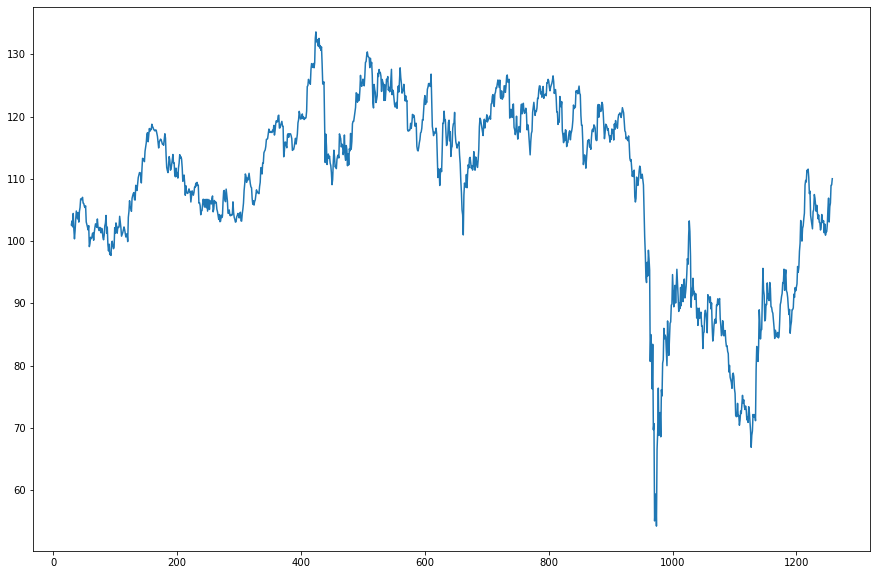

In [10]:
plt.figure(figsize= (15,10))
plt.plot( cvx['Close'])
plt.show()

## Stacked LSTM

In [11]:
cvx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,TR,+DM 1,...,12_day_EMA,30_day_EMA,MACD,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
29,2016-06-20,102.879997,103.400002,102.599998,102.610001,83.487595,6627000,-728100,1.830002,1.660004,...,101.857500,101.272332,0.585167,0.846177,0.846177,0.000000,0.291747,0.198178,1.472143,59.549267
30,2016-06-21,102.690002,103.449997,102.269997,103.239998,84.000191,4938700,4210600,1.180000,0.000000,...,102.072499,101.368666,0.703833,0.512596,0.512596,0.000000,0.320805,0.198178,1.618767,61.814086
31,2016-06-22,103.500000,103.550003,102.190002,102.290001,83.227249,4866400,-655800,1.360001,0.100006,...,102.165833,101.402666,0.763167,-0.772942,0.000000,0.772942,0.320805,0.218518,1.468090,59.482833
32,2016-06-23,103.449997,104.449997,103.070000,104.440002,84.976555,5593600,4937800,2.159996,0.899994,...,102.259166,101.512666,0.746500,1.749306,1.749306,0.000000,0.438200,0.218518,2.005322,66.725694
33,2016-06-24,101.459999,103.010002,101.169998,101.900002,82.909904,11481400,-6543600,3.270004,0.000000,...,102.160000,101.505333,0.654667,-2.066651,0.000000,2.066651,0.408561,0.366136,1.115870,52.738121


In [12]:
cvx_final = cvx[['Close', 'Volume','OBV','ADX','MACD','RSI']]

In [13]:
cvx_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 29 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1230 non-null   float64
 1   Volume  1230 non-null   int64  
 2   OBV     1230 non-null   int64  
 3   ADX     1230 non-null   float64
 4   MACD    1230 non-null   float64
 5   RSI     1230 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 67.3 KB


In [14]:

training_set = cvx_final.iloc[:1000].values

In [15]:
training_set

array([[ 1.02610001e+02,  6.62700000e+06, -7.28100000e+05,
         2.12667868e+01,  5.85166967e-01,  5.95492667e+01],
       [ 1.03239998e+02,  4.93870000e+06,  4.21060000e+06,
         2.11209810e+01,  7.03833133e-01,  6.18140862e+01],
       [ 1.02290001e+02,  4.86640000e+06, -6.55800000e+05,
         2.09128182e+01,  7.63166583e-01,  5.94828332e+01],
       ...,
       [ 1.00809998e+02,  1.27601000e+07,  2.19522500e+08,
         2.46847484e+01,  1.68433275e+00,  7.01557643e+01],
       [ 1.03239998e+02,  1.10907000e+07,  2.30613200e+08,
         2.64306373e+01,  1.99666605e+00,  6.79061938e+01],
       [ 1.01529999e+02,  1.07454000e+07,  2.19867800e+08,
         2.62502284e+01,  2.39349922e+00,  7.07998949e+01]])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [19]:
X_train

array([[[-1.64709989],
        [-1.5911574 ],
        [-1.64628092],
        ...,
        [-1.72213352],
        [-1.62982565],
        [-1.73517472]],

       [[-1.5911574 ],
        [-1.64628092],
        [-1.58292014],
        ...,
        [-1.62982565],
        [-1.73517472],
        [-1.82807502]],

       [[-1.64628092],
        [-1.58292014],
        [-1.71297421],
        ...,
        [-1.73517472],
        [-1.82807502],
        [-1.75216351]],

       ...,

       [[-1.17681126],
        [-1.4686972 ],
        [-1.20253232],
        ...,
        [ 0.67979118],
        [ 0.77539645],
        [ 0.70322185]],

       [[-1.4686972 ],
        [-1.20253232],
        [-1.40116116],
        ...,
        [ 0.77539645],
        [ 0.70322185],
        [ 0.84776023]],

       [[-1.20253232],
        [-1.40116116],
        [-1.14420882],
        ...,
        [ 0.70322185],
        [ 0.84776023],
        [ 0.97338869]]])

In [20]:
y_train

array([-1.31482223e+00, -1.21759115e+00, -1.36703901e+00, -1.34903284e+00,
       -1.37964293e+00, -1.20588770e+00, -1.17437714e+00, -1.24279907e+00,
       -1.28241184e+00, -1.26440576e+00, -9.79015129e-01, -1.05824076e+00,
       -9.09693453e-01, -9.52006994e-01, -1.05824076e+00, -9.71812750e-01,
       -9.76314451e-01, -9.68212145e-01, -8.14262668e-01, -8.98889749e-01,
       -9.79015129e-01, -1.10145414e+00, -1.07534575e+00, -1.05013783e+00,
       -1.01142552e+00, -9.68212145e-01, -1.00422305e+00, -1.05553936e+00,
       -1.11315759e+00, -1.10325507e+00, -1.06544260e+00, -1.17977931e+00,
       -8.28667517e-01, -7.44940902e-01, -5.89191123e-01, -6.87322677e-01,
       -6.87322677e-01, -7.42240134e-01, -5.55880984e-01, -5.16268122e-01,
       -4.84758286e-01, -4.71253813e-01, -5.74786904e-01, -5.79288605e-01,
       -3.65920510e-01, -4.20838057e-01, -4.41544189e-01, -3.44313822e-01,
       -2.56085506e-01, -2.16472644e-01, -1.82262039e-01, -1.82262039e-01,
       -2.27276348e-01, -

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
30/30 [==============================] - 12s 54ms/step - loss: 0.6006
Epoch 2/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5391
Epoch 3/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5388
Epoch 4/50
30/30 [==============================] - 2s 55ms/step - loss: 0.5268
Epoch 5/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5234
Epoch 6/50
30/30 [==============================] - 2s 54ms/step - loss: 0.4599
Epoch 7/50
30/30 [==============================] - 2s 54ms/step - loss: 0.4831
Epoch 8/50
30/30 [==============================] - 2s 53ms/step - loss: 0.4818
Epoch 9/50
30/30 [==============================] - 2s 55ms/step - loss: 0.4843
Epoch 10/50
30/30 [==============================] - 2s 54ms/step - loss: 0.4254
Epoch 11/50
30/30 [==============================] - 2s 54ms/step - loss: 0.3782
Epoch 12/50
30/30 [==============================] - 2s 53ms/step - loss: 0.3692
Epoch 13/50
30/30 [=================

In [43]:
#Standard scalar for test set
scaler_test = StandardScaler()
test_set_scaled = scaler_test.fit_transform(cvx_final['OBV'].values.reshape(-1,1))

In [44]:
dataset_total = pd.concat((cvx_final['OBV'].iloc[:1000], cvx_final['OBV'][1000:]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(cvx_final['OBV'][1000:]) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler_test.transform(inputs)
X_test = []
for i in range(60, 291):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler_test.inverse_transform(predicted_stock_price)

In [45]:
predicted_stock_price

array([[ 1.01357736e+08],
       [ 1.57098320e+08],
       [ 1.70130720e+08],
       [ 1.97567840e+08],
       [ 1.98355984e+08],
       [ 1.96314640e+08],
       [ 2.06790144e+08],
       [ 1.97253616e+08],
       [ 1.76711888e+08],
       [ 1.53822240e+08],
       [ 1.38561504e+08],
       [ 1.28541560e+08],
       [ 1.24566232e+08],
       [ 1.24149032e+08],
       [ 1.25776624e+08],
       [ 1.28481056e+08],
       [ 1.31342632e+08],
       [ 1.33978568e+08],
       [ 1.36455968e+08],
       [ 1.38762640e+08],
       [ 1.41018800e+08],
       [ 1.43132128e+08],
       [ 1.45091488e+08],
       [ 1.47056976e+08],
       [ 1.49378320e+08],
       [ 1.52152656e+08],
       [ 1.55015808e+08],
       [ 1.57030816e+08],
       [ 1.56960640e+08],
       [ 1.55191216e+08],
       [ 1.52302544e+08],
       [ 1.48656720e+08],
       [ 1.44408800e+08],
       [ 1.40491264e+08],
       [ 1.37785232e+08],
       [ 1.37276896e+08],
       [ 1.38366512e+08],
       [ 1.39157168e+08],
       [ 1.3

In [27]:
real_stock_price = cvx['Close'][1000:].values

In [28]:
real_stock_price

array([ 97.580002,  89.370003,  92.389999,  91.230003,  94.029999,
        91.540001,  91.940002,  90.629997,  91.589996,  91.440002,
        87.639999,  89.209999,  86.459999,  87.669998,  89.230003,
        87.620003,  88.309998,  88.57    ,  86.309998,  86.349998,
        82.739998,  85.230003,  85.400002,  88.349998,  88.889999,
        88.360001,  87.190002,  85.269997,  91.389999,  91.040001,
        91.010002,  90.129997,  91.040001,  89.110001,  90.07    ,
        86.269997,  83.940002,  84.809998,  86.489998,  87.199997,
        87.470001,  86.800003,  89.730003,  89.620003,  90.720001,
        89.82    ,  90.349998,  90.769997,  87.629997,  86.389999,
        84.809998,  85.080002,  87.199997,  86.129997,  84.779999,
        84.910004,  85.629997,  83.93    ,  83.080002,  83.190002,
        82.279999,  81.93    ,  78.970001,  80.029999,  78.150002,
        77.690002,  77.290001,  76.349998,  78.559998,  78.790001,
        78.209999,  76.300003,  75.529999,  71.949997,  71.800

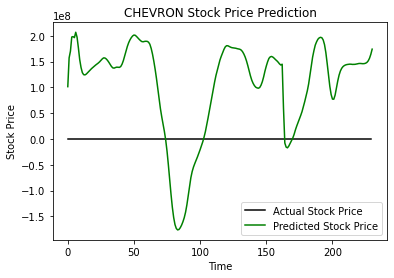

In [46]:
plt.plot(real_stock_price, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('CHEVRON Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()